In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Math

# Task 1

In [2]:
data_df = pd.read_csv('task-1.csv')
print(data_df.shape)
data_df.head()

(50, 2)


,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


In [3]:
x = data_df.x.values
y = data_df.y.values

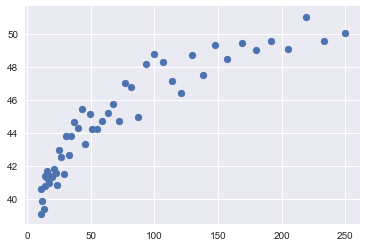

In [4]:
sns.set()
plt.scatter(x,y)
plt.show()

In [5]:
#Fit the equation using polyfit() and print the a, b parameters.
x_log= np.log(x)
a, b= np.polyfit(x_log, y, deg=1)
print('a: {:.2F}\nb: {:.2F}'.format(a, b))

a: 3.39
b: 31.53


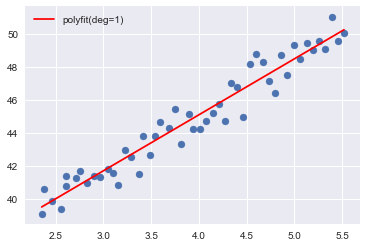

In [6]:
#Plot your model with the 50 data points, i.e., the curve that corresponds to the equation from above.
x_values = np.linspace(min(x_log), max(x_log), num=100)
y_values = a*x_values + b

# Plot the line
plt.scatter(x_log, y, label=None)
plt.plot(x_values, y_values, color='red', label='polyfit(deg=1)')
plt.legend()
plt.show()


In [7]:
# Compute and print the R2 coefficient using Numpy.
y_pred= a*x_log + b

# Define RSS measure
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))

# RSS of the baseline
rss_baseline = RSS(y, y.mean())
print('RSS baseline: {:.2F}'.format(rss_baseline))

rss_model = RSS(y, y_pred)
print('RSS baseline: {:.2F}'.format(rss_model))

rsqr = 1 - rss_model/ rss_baseline
print('R2: {:.3F}'.format(rsqr))

RSS baseline: 541.14
RSS baseline: 31.84
R2: 0.941


### Explain how the polyfit() function finds the optimal parameters. (1-2 sentences)
From the doc: it fits a polynomialof specified degree to points (x, y). polyfit() minimizes the squared error :

In [8]:
Math(r'E = \sum_{j=0}^k |p(x_j) - y_j|^2')

<IPython.core.display.Math object>

with ```p(x) = p[0] * x**deg + ... + p[deg]``` using polynomial interpolation, hence solving the system of linear equations X.p=y with p the coefficients matrix:

```x[0]**n * p[0] + ... + x[0] * p[n-1] + p[n] = y[0]
 x[1]**n * p[0] + ... + x[1] * p[n-1] + p[n] = y[1]
 ...
 x[k]**n * p[0] + ... + x[k] * p[n-1] + p[n] = y[k]```

### Give two differences between this method and the gradient descent one. Write a short sentence for each one.
* polyfit() returns an algebraic solution while gradient descent "approaches" the solution via step-by-step procedure
* non convex partial derivatives can lead to suboptimal solution with the gradient descent method, while a single solution exists with polyfit()

# Task 2

In [9]:
#Load and split the data into 80-20 train/test sets using train_test_split(). Set the random_state to zero.
data_df = pd.read_csv('task-2.csv')
print(data_df.shape)
data_df.head()

(1000, 4)


,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [10]:
x = data_df.drop('y', axis=1).values
y = data_df.y.values

In [11]:
from sklearn.model_selection import train_test_split
# Split intro train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    x, y, test_size=.2, random_state=0)

print('Train set:', X_tr.shape, y_tr.shape) 
print('Test set:', X_te.shape, y_te.shape) 

Train set: (800, 3) (800,)
Test set: (200, 3) (200,)


In [12]:
# Fit and evaluate a linear regression using the train/test set methodology. 
# Print the mean absolute error (MAE) on the test set.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [14]:
y_pred_tr = lr.predict(X_tr)
y_pred_te = lr.predict(X_te)

mae_lr_tr= MAE(y_tr, y_pred_tr)
mae_lr_te= MAE(y_te, y_pred_te)

print('MAE train: {:.2F}\nMAE test: {:.2F}'.format(mae_lr_tr, mae_lr_te))

MAE train: 119.67
MAE test: 104.79


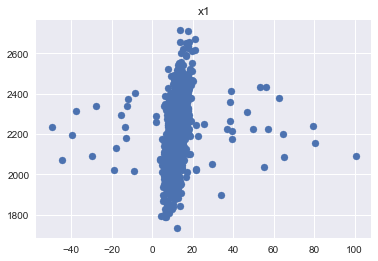

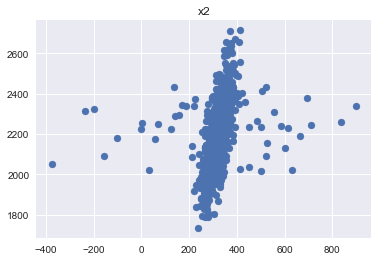

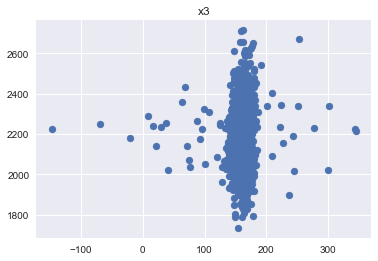

In [15]:
#Improve your test MAE by removing outliers from the train set.
for column in data_df.drop('y', axis=1).columns:
    plt.scatter(data_df[column],y)
    plt.title(column)
    plt.show()

In [16]:
# Using z-score
x1_z_scores = (X_tr[:,0] - X_tr[:,0].mean()) / X_tr[:,0].std()
x2_z_scores = (X_tr[:,1] - X_tr[:,1].mean()) / X_tr[:,1].std()
x3_z_scores = (X_tr[:,2] - X_tr[:,2].mean()) / X_tr[:,2].std()

In [17]:
print('x1, numbre of outliers: ', (abs(x1_z_scores)>2).sum())
print('x2, numbre of outliers: ', (abs(x2_z_scores)>2).sum())
print('x3, numbre of outliers: ', (abs(x3_z_scores)>2).sum())

x1, numbre of outliers:  31
x2, numbre of outliers:  29
x3, numbre of outliers:  28


In [18]:
## removing all rows that have at least one outlier
idx = np.all(np.c_[np.abs(x1_z_scores) < 2, 
                   np.abs(x2_z_scores) < 2, 
                   np.abs(x3_z_scores) < 2], axis=1)
idx.sum()

755

In [19]:
X1_tr, y1_tr  = X_tr[idx], y_tr[idx]

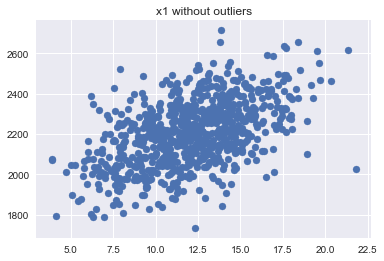

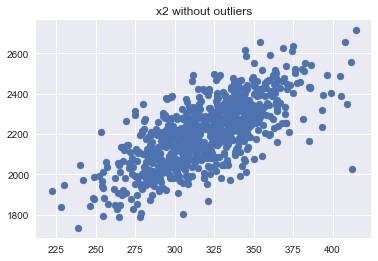

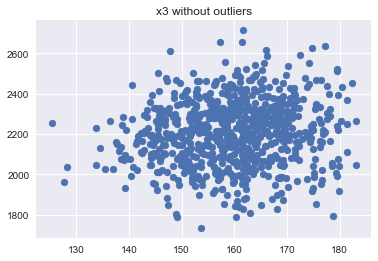

In [20]:
for i in range(3):
    plt.scatter(X1_tr[:, i],y1_tr)
    plt.title('x{} without outliers'.format(i+1))
    plt.show()

In [21]:
lr1 = LinearRegression()
lr1.fit(X1_tr, y1_tr)

y1_pred_tr = lr1.predict(X1_tr)
y1_pred_te = lr1.predict(X_te)

mae_lr1_tr= MAE(y1_tr, y1_pred_tr)
mae_lr1_te= MAE(y_te, y1_pred_te)

print('MAE train without outliers: {:.2F}\nMAE test without outliers: {:.2F}'.format(mae_lr1_tr, mae_lr1_te))

MAE train without outliers: 53.81
MAE test without outliers: 69.30


In [22]:
# Fit a linear regression with Huber loss (using the train points with outliers). 
# Print its MAE on the test set.
from sklearn.linear_model import SGDRegressor

lr_huber = SGDRegressor(loss='huber', epsilon=1.1, max_iter=10000)
lr_huber.fit(X_tr, y_tr)

y_pred_train_hbr = lr_huber.predict(X_tr)
y_pred_test_hbr = lr_huber.predict(X_te)

hbr_train_mae = MAE(y_tr, y_pred_train_hbr)
hbr_test_mae = MAE(y_te, y_pred_test_hbr)

print('Huber MAE train: {:.2F}\nHuber MAE test: {:.2F}'.format(hbr_train_mae, hbr_test_mae))

Huber MAE train: 129.56
Huber MAE test: 79.71


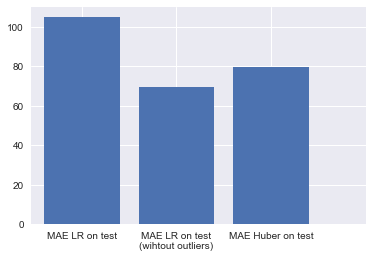

In [23]:
plt.bar([1, 2, 3], [mae_lr_te, mae_lr1_te, hbr_test_mae])
plt.xticks([1, 2, 3, 4], ['MAE LR on test', 'MAE LR on test\n(wihtout outliers)', 'MAE Huber on test'])
plt.show()


# Task 3

In [24]:
data_df = pd.read_csv('task-3.csv')
print(data_df.shape)
data_df.head()

(50, 2)


,x,y
0,3.588,0.473
1,3.551,0.784
2,3.610,0.847
3,3.704,0.904
4,3.716,1.118


In [25]:
x = data_df.x.values
y = data_df.y.values

In [26]:
# Split data into 50-50 train/test sets using train_test_split(). Set the random_state to zero.
X_tr, X_te, y_tr, y_te = train_test_split(
    x, y, test_size=.5, random_state=0)

print('Train set:', X_tr.shape, y_tr.shape) 
print('Test set:', X_te.shape, y_te.shape) 

Train set: (25,) (25,)
Test set: (25,) (25,)


In [27]:
# Fit a polynomial of degree 10 to the train set. 
# Print its residual sum of squares (RSS) on the train/test sets.
# Does your model overfit?
from sklearn.preprocessing import PolynomialFeatures

pf_obj = PolynomialFeatures(degree=10)

X2_tr = pf_obj.fit_transform(X_tr[:, np.newaxis])
X2_te = pf_obj.fit_transform(X_te[:, np.newaxis])

print('X2_tr Shape:', X2_tr.shape, '\nX2_te Shape:', X2_te.shape)

X2_tr Shape: (25, 11) 
X2_te Shape: (25, 11)


In [28]:
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))


lr = LinearRegression()
lr.fit(X2_tr, y_tr)

y_pred_tr=lr.predict(X2_tr)
y_pred_te=lr.predict(X2_te)

rss_lr_tr = RSS(y_tr, y_pred_tr)
rss_lr_te = RSS(y_te, y_pred_te)

print('RSS train:', rss_lr_tr, '\nRSS test:', rss_lr_te)

RSS train: 0.6838998903863828 
RSS test: 1.570459921978028


In [29]:
x_values = np.linspace(min(x), max(x), num=100)
X_values2 = pf_obj.fit_transform(x_values[:, np.newaxis])
y2_values = lr.predict(X_values2)

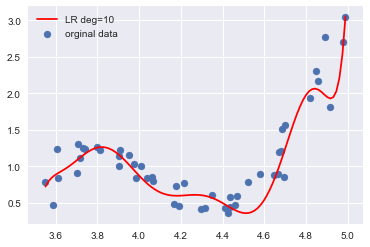

In [30]:
plt.scatter(x, y, label='orginal data')
plt.plot(x_values, y2_values, color='red', label='LR deg=10')
plt.legend()
plt.show()

In [31]:
rss_lr_te/ rss_lr_tr

2.2963301267540275

RSS on test set is 2.3x larger than RSS on train set. Overfitting is confirmed by the plot. 

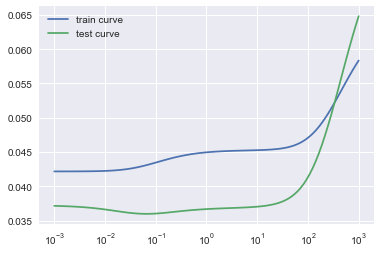

In [34]:
# Apply regularization using ridge regression. Tune the regularization strength using grid search.
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')

# zooming after tests
alphas = np.logspace(-3, 3, num=100)

train_scores = []
test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=10000)
    ridge.fit(X2_tr, y_tr)

    y_pred = ridge.predict(X2_tr)
    train_mse = mse(y_tr, y_pred)
    train_scores.append(train_mse)

    y_pred = ridge.predict(X2_te)
    test_mse = mse(y_te, y_pred)
    test_scores.append(test_mse)

plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.legend()
plt.show()

In [36]:
idx = np.argmin(test_scores)
best_alpha = alphas[idx]
best_test_score = test_scores[idx]
best_train_score = train_scores[idx]

print('Best alpha value {:.4f} with\nMSE test score {:.3f}\nMSE train score {:.3f}'.format(
    best_alpha, best_test_score, best_train_score))

Best alpha value 0.0658 with
MSE test score 0.036
MSE train score 0.043


Note: train score is larger than test score, which could be explained by the small sets size, coming from the way the data is split, or the good generalization of the model. The polynomial extension to the degree 10 night well be responsible of model "instability". 

For future reference: <a href='https://www.quora.com/Is-it-possible-to-have-a-higher-train-error-than-a-test-error-in-machine-learning'>Quora answer </a>. 

In [43]:
# Compute the train/test RSS of tuned ridge regression model. Plot the new curve.
best_ridge = Ridge(best_alpha)
best_ridge.fit(X2_tr, y_tr)

y_pred_tr = best_ridge.predict(X2_tr)
rss_tr = RSS(y_tr, y_pred_tr)

y_pred_te = best_ridge.predict(X2_te)
rss_te = RSS(y_te, y_pred_te)

print('Ridge RSS train:', rss_tr, '\nRidge RSS test:', rss_te)

Ridge RSS train: 1.0773812347684715 
Ridge RSS test: 0.8997669553106133


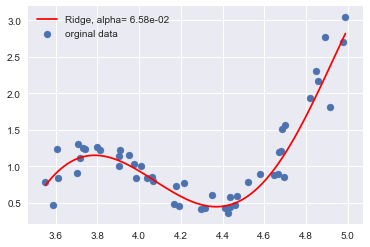

In [45]:
x_values = np.linspace(min(x), max(x), num=100)
X_values2 = pf_obj.fit_transform(x_values[:, np.newaxis])
y2_values = best_ridge.predict(X_values2)

plt.scatter(x, y, label='orginal data')
plt.plot(x_values, y2_values, color='red', label='Ridge, alpha= {:.2e}'.format(best_alpha))
plt.legend()
plt.show()